# **NOTE:** Use File > Save a copy in Drive to make a copy before doing anything else


# Project 6: Advanced Text Analysis with SpaCy

### Overview

In this project, we will enhance our text analysis techniques by applying proper data pre-processing to extract more meaningful information from literary texts. We'll continue working with the first two chapters of "Pride and Prejudice" but will implement advanced text cleaning methods using the SpaCy library to obtain more insightful word frequency results.

### Project Objectives

*   Apply proper text pre-processing techniques to extract
meaningful words

*   Use SpaCy to clean and normalize text data
*   Identify the 15 most frequently used meaningful words in a text

*   Analyze how pre-processing affects text analysis results
*   Apply the same techniques to a text of your choice

### Part 0: Text analysis without text cleaning (Lab6)

#### Loading Data

We will fetch the first two chapters of Jane Austen's Pride and Prejudice from [Project Gutenberg](https://www.gutenberg.org/ebooks/1342)


#### Function to fetch data

In [ ]:
def fetch_text(raw_url):
  import requests
  from pathlib import Path
  import hashlib

  CACHE_DIR = Path("cs_110_content/text_cache")
  CACHE_DIR.mkdir(parents=True, exist_ok=True)

  def _url_to_filename(url):
    url_hash = hashlib.sha1(url.encode("utf-8")).hexdigest()[:12]
    return CACHE_DIR / f"{url_hash}.txt"

  cache_path = _url_to_filename(raw_url)

  SUCCESS_MSG = "✅ Text fetched."
  FAILURE_MSG = "❌ Failed to fetch text."
  try:
    if not cache_path.exists():
      response = requests.get(raw_url, timeout=10)
      response.raise_for_status()
      text_data = response.text
      cache_path.write_text(text_data, encoding="utf-8")
    print(SUCCESS_MSG)
    return cache_path.read_text(encoding="utf-8")

  except Exception as e:
    print(FAILURE_MSG)
    print(f"Error: {e}")
    return ""

#### Save the text in a variable

In [ ]:
PRIDE_PREJUDICE_URL = "https://gist.githubusercontent.com/goodbadwolf/8514e63776c1e9717d844ea4ee407739/raw/fdc87a64fd18e6ddb01ce8d758f8f2de8d03e163/pride_prejudice_excerpt.txt"

pride_prejudice_text = fetch_text(PRIDE_PREJUDICE_URL)

✅ Text fetched.


#### Statistics about the data

In [ ]:
def print_text_stats(text):
  num_chars = len(text)

  lines = text.splitlines()
  num_lines = len(lines)

  num_words = 0
  for line in lines:
    words_in_line = line.split()
    num_words_in_line = len(words_in_line)
    num_words += num_words_in_line

  print(f"Number of characters: {num_chars}")
  print(f"Number of lines: {num_lines}")
  print(f"Number of words: {num_words}")

print_text_stats(pride_prejudice_text)

Number of characters: 8798
Number of lines: 220
Number of words: 1648


In [ ]:
def get_word_counts(text):
  word_counts = {}
  lines = text.splitlines()
  for line in lines:
    words = line.split()
    for word in words:
      word = word.lower()
      if word in word_counts:
        word_counts[word] += 1
      else:
        word_counts[word] = 1
  return word_counts

word_counts = get_word_counts(pride_prejudice_text)
print(word_counts)

{'chapter': 2, 'i.': 1, 'it': 18, 'is': 20, 'a': 31, 'truth': 2, 'universally': 1, 'acknowledged,': 1, 'that': 22, 'single': 2, 'man': 5, 'in': 17, 'possession': 2, 'of': 46, 'good': 4, 'fortune': 2, 'must': 8, 'be': 15, 'want': 3, 'wife.': 3, 'however': 1, 'little': 4, 'known': 2, 'the': 48, 'feelings': 1, 'or': 5, 'views': 1, 'such': 8, 'may': 6, 'on': 10, 'his': 16, 'first': 2, 'entering': 1, 'neighbourhood,': 1, 'this': 4, 'so': 10, 'well': 2, 'fixed': 1, 'minds': 1, 'surrounding': 1, 'families,': 1, 'he': 18, 'considered': 1, 'as': 15, 'rightful': 1, 'property': 1, 'some': 2, 'one': 7, 'other': 2, 'their': 3, 'daughters.': 3, '“my': 3, 'dear': 3, 'mr.': 22, 'bennet,”': 2, 'said': 10, 'lady': 3, 'to': 41, 'him': 8, 'day,': 1, '“have': 1, 'you': 45, 'heard': 2, 'netherfield': 2, 'park': 1, 'let': 1, 'at': 7, 'last?”': 1, 'bennet': 7, 'replied': 4, 'had': 7, 'not.': 1, '“but': 4, 'is,”': 2, 'returned': 1, 'she;': 1, '“for': 1, 'mrs.': 9, 'long': 6, 'has': 8, 'just': 2, 'been': 2, 'he

In [ ]:
# prompt: Make a new Code Cell below and use Gemini to create a new function called print_top_10_frequent_words that will call the above get_word_counts() and print only the top 10 frequent words.

import operator

def print_top_10_frequent_words(text):
    word_counts = get_word_counts(text)
    sorted_word_counts = dict(sorted(word_counts.items(), key=operator.itemgetter(1), reverse=True))
    top_10_words = list(sorted_word_counts.items())[:10]  # Get the top 10 words and counts
    for word, count in top_10_words:
        print(f"{word}: {count}")

print_top_10_frequent_words(pride_prejudice_text)

the: 48
of: 46
you: 45
to: 41
a: 31
i: 31
and: 28
not: 24
that: 22
mr.: 22


### Part 1: Analyzing "Pride and Prejudice" with Pre-processing

In our previous lab, we simply counted word frequencies without any sophisticated pre-processing, resulting in common but uninformative words (like "the", "and", "to") dominating our results.

You will use SpaCy, a powerful Natural Language Processing library, to perform these operations. SpaCy provides pre-trained models that can handle tokenization, stop word removal, and lemmatization automatically.





In [ ]:
# install spacy library
#!pip install spacy (uncomment it to install)

In [ ]:
# bring the spacy library into scope
import spacy

In [72]:
# Load a SpaCy model
nlp = spacy.load('en_core_web_sm')

Explanation:

spacy: This is the spaCy library, a popular and efficient NLP library in Python.

load(): This function loads a pre-trained NLP model.

'en_core_web_sm': This is the name of the small English-language model. It's a lightweight model that includes:

*   Tokenization (splitting text into words, punctuation, etc.)

*  Part-of-speech (POS) tagging

*  Named entity recognition (NER) etc

nlp: This variable now holds the loaded model.

In [ ]:
def word_tokenization_normalization(text):

    text = text.lower() # lowercase
    doc = nlp(text)     # loading text into model

    words_normalized = []
    for word in doc:
        if word.text != '\n' \
        and not word.is_stop \
        and not word.is_punct \
        and not word.like_num \
        and len(word.text.strip()) > 2:
            word_lemmatized = str(word.lemma_)
            words_normalized.append(word_lemmatized)

    return words_normalized

#### TODO

1. Use "Explain Code" AI feature to understand what this function, *word_tokenization_normalization(text)* does and write a short summary of about what it does. You may use bullet points. (Please create another text cell under this cell to write the summary.)

First takes the imput of text and outputs it as lowecase. Then loads it into SpaCy which will then go through all of the if conditions and if the word gets through all of the conditions then it is considered meaningful. It will go through this process with each word.

#### TODO

2. Use this function to get meaningful words from pride_prejudice_text. All you need to do is call the function with the correct input text. (Please create a code cell under this cell to accomplish it.)

In [30]:
word_tokenization_normalization(pride_prejudice_text)

['chapter',
 'truth',
 'universally',
 'acknowledge',
 'single',
 'man',
 'possession',
 'good',
 'fortune',
 'want',
 'wife',
 'little',
 'know',
 'feeling',
 'view',
 'man',
 'enter',
 'neighbourhood',
 'truth',
 'fix',
 'mind',
 'surround',
 'family',
 'consider',
 'rightful',
 'property',
 'daughter',
 'dear',
 'bennet',
 'say',
 'lady',
 'day',
 'hear',
 'netherfield',
 'park',
 'let',
 'bennet',
 'reply',
 'return',
 'mrs',
 'long',
 'tell',
 'bennet',
 'answer',
 'want',
 'know',
 'take',
 'cry',
 'wife',
 'impatiently',
 'want',
 'tell',
 'objection',
 'hear',
 'invitation',
 'dear',
 'know',
 'mrs',
 'long',
 'say',
 'netherfield',
 'take',
 'young',
 'man',
 'large',
 'fortune',
 'north',
 'england',
 'come',
 'monday',
 'chaise',
 'place',
 'delighted',
 'agree',
 'morris',
 'immediately',
 'possession',
 'michaelma',
 'servant',
 'house',
 'end',
 'week',
 'bingley',
 'married',
 'single',
 'single',
 'dear',
 'sure',
 'single',
 'man',
 'large',
 'fortune',
 'year',
 'fine

#### TODO

3. Make a new Code Cell below and use Gemini to create a new function called *create_word_frequency_dict* from the result you got from the previous task. This function should return a word frequency dictionary, meaning this is a fruitful function.

In [49]:
# prompt: create a new function called create_word_frequency_dict. This function should return a word frequency dictionary

def create_word_frequency_dict(text):
    """
    Creates a word frequency dictionary from a given text.

    Args:
        text: The input text.

    Returns:
        A dictionary where keys are words and values are their frequencies.
    """
    word_frequencies = {}
    normalized_words = word_tokenization_normalization(text)
    for word in normalized_words:
        if word in word_frequencies:
            word_frequencies[word] += 1
        else:
            word_frequencies[word] = 1
    return word_frequencies

create_word_frequency_dict(pride_prejudice_text)


{'chapter': 2,
 'truth': 2,
 'universally': 1,
 'acknowledge': 1,
 'single': 4,
 'man': 6,
 'possession': 2,
 'good': 6,
 'fortune': 3,
 'want': 3,
 'wife': 7,
 'little': 5,
 'know': 14,
 'feeling': 1,
 'view': 1,
 'enter': 1,
 'neighbourhood': 3,
 'fix': 1,
 'mind': 2,
 'surround': 1,
 'family': 1,
 'consider': 3,
 'rightful': 1,
 'property': 1,
 'daughter': 6,
 'dear': 10,
 'bennet': 15,
 'say': 11,
 'lady': 4,
 'day': 3,
 'hear': 4,
 'netherfield': 2,
 'park': 1,
 'let': 2,
 'reply': 5,
 'return': 3,
 'mrs': 9,
 'long': 6,
 'tell': 4,
 'answer': 1,
 'take': 2,
 'cry': 4,
 'impatiently': 1,
 'objection': 1,
 'invitation': 1,
 'young': 5,
 'large': 2,
 'north': 1,
 'england': 1,
 'come': 6,
 'monday': 1,
 'chaise': 1,
 'place': 1,
 'delighted': 1,
 'agree': 2,
 'morris': 1,
 'immediately': 1,
 'michaelma': 1,
 'servant': 1,
 'house': 1,
 'end': 2,
 'week': 1,
 'bingley': 11,
 'married': 1,
 'sure': 3,
 'year': 4,
 'fine': 1,
 'thing': 3,
 'girl': 7,
 'affect': 1,
 'tiresome': 1,
 'thi

#### TODO

4. Make a new Code Cell below and use Gemini to create a new function called *print_top_words* to print out the result as shown below (This is just a print function):

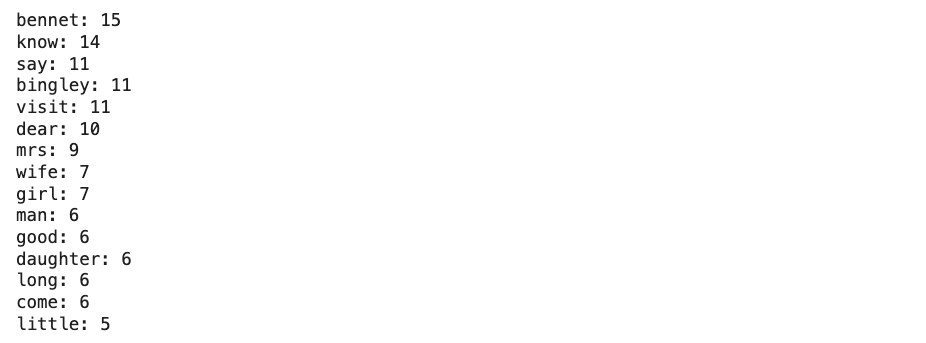

In [71]:
# prompt: create a new function called print_top_words.

def print_top_words(word_frequency_dict, top_n=15):
    """
    Prints the top N most frequent words from a word frequency dictionary.

    Args:
        word_frequency_dict: A dictionary where keys are words and values are their frequencies.
        top_n: The number of top words to print (default is 15).
    """
    sorted_word_counts = dict(sorted(word_frequency_dict.items(), key=operator.itemgetter(1), reverse=True))
    top_words = list(sorted_word_counts.items())[:top_n]  # Get the top N words and counts
    for word, count in top_words:
        print(f"{word}: {count}")

word_freq = create_word_frequency_dict(pride_prejudice_text)
print_top_words(word_freq, 15)



bennet: 15
know: 14
say: 11
bingley: 11
visit: 11
dear: 10
mrs: 9
wife: 7
girl: 7
man: 6
good: 6
daughter: 6
long: 6
come: 6
little: 5


### Part 2: Text Analysis of your choice with pre-processing

For the second part of the project, you will:

* Choose another text that interests you (a novel, article, speech, etc.) (You should make another copy of this colab file and change the name to CS110_Project6_Part2.ipynb)
* Produce 10 to 15 most frequrently used words without text preprocessing
* Apply the same pre-processing steps using SpaCy
* Identify the 15 most frequently used meaningful words
* Write a 1-2 paragraph analysis of what these words reveal about the text's content and themes, and why we need text pre-processing now that you have worked on at least two sets of text

In [73]:
import spacy
import operator
nlp = spacy.load('en_core_web_sm')

def word_tokenization_normalization(text):

    text = text.lower() # lowercase
    doc = nlp(text)     # loading text into model

    words_normalized = []
    for word in doc:
        if word.text != '\n' \
        and not word.is_stop \
        and not word.is_punct \
        and not word.like_num \
        and len(word.text.strip()) > 2:
            word_lemmatized = str(word.lemma_)
            words_normalized.append(word_lemmatized)

    return words_normalized

def create_word_frequency_dict(text):
    """
    Creates a word frequency dictionary from a given text.

    Args:
        text: The input text.

    Returns:
        A dictionary where keys are words and values are their frequencies.
    """
    word_frequencies = {}
    normalized_words = word_tokenization_normalization(text)
    for word in normalized_words:
        if word in word_frequencies:
            word_frequencies[word] += 1
        else:
            word_frequencies[word] = 1
    return word_frequencies

def print_top_words(word_frequency_dict, top_n=15):
    """
    Prints the top N most frequent words from a word frequency dictionary.

    Args:
        word_frequency_dict: A dictionary where keys are words and values are their frequencies.
        top_n: The number of top words to print (default is 15).
    """
    sorted_word_counts = dict(sorted(word_frequency_dict.items(), key=operator.itemgetter(1), reverse=True))
    top_words = list(sorted_word_counts.items())[:top_n]  # Get the top N words and counts
    for word, count in top_words:
        print(f"{word}: {count}")

article_text = """Exposure to junk food advertisements (relative to non-food) results in children and adolescents consuming significantly more calories during the day, regardless of the type of media advertising, according to a randomised crossover trial being presented at this year's European Congress on Obesity (ECO) in Malaga, Spain (11-14 May).
The study found that 7–15-year-olds exposed to just 5 minutes of adverts for foods high in saturated fats, sugar, and/or salt (HFSS) consumed an average of 130 kcals per day extra, which is equivalent to the calories in two slices of bread.
The timely research is presented as many countries across Europe and globally are considering implementing curbs on unhealthy food advertising to tackle rising childhood obesity levels.
"Our findings offer crucial novel information on the extent, nature, and impact of unhealthy food marketing via different types of media on young people's eating behaviour," said lead author Professor Emma Boyland from the University of Liverpool in the UK. "Even short exposure to marketing of foods high in fat, salt, and sugar can drive excess calorie consumption and potentially weight gain, particularly in young people who are more susceptible to advertising and whose eating patterns influence their lifelong health."
The causes of obesity are complex and influenced by many factors. While research has highlighted connections between product-based advertising of foods HFSS in audiovisual media and children's immediate [1] and later consumption [2], little is known about the impact of other forms of media, including brand-only (i.e., ads only featuring branding elements such as logos, but no food or beverage products) or audio advertisements (e.g., podcasts, radio), on shaping eating patterns.
It is also unclear whether food advertising effects differ by individuals' sociodemographic characteristics and how it may contribute to health inequalities.
To explore this further, researchers conducted a randomised crossover trial to quantify the impact of HFSS food (vs non-food) ad exposure on children's immediate and later intake, and to assess whether this was moderated by either advertisement content (brand-only vs. product), media type (audiovisual [e.g., TV] vs. visual [some social media posts] vs. audio [podcasts] vs. static [paper billboards]), or sociodemographic characteristics.
In total, 240 volunteers between the ages of 7 and 15 from schools across Merseyside, UK, participated in the study. On two different occasions, participants were exposed to five minutes of HFSS food and then non-food advertisements that were either brand-only or product-based through one of the four different media.
Researchers then measured children's subsequent ad libitum intake of snack and lunch foods and their height and weight to calculate their body mass index (BMI). Home postcodes were used to calculate area-level socioeconomic status (SES) using the 2019 English Index of Multiple Deprivation.
The analysis found that following exposure to HFSS food ads, children consumed more snacks (+58.4 kcals), more lunch (+72.5 kcals), and more food overall (snack and lunch combined, +130.90 kcals) than after exposure to non-food ads.
Interestingly, advertisement content did not moderate this effect, such that brand-only ads were as effective as product ads in increasing intake.
While neither the type of media (i.e., audiovisual, visual, audio, static image) nor socioeconomic status moderated children's intake, the researchers found that for every standardised unit increase in BMI score (zBMI, adjusted for a child's age and sex), children consumed an additional 17 kcal overall. According to Professor Boyland, "Our results show that unhealthy food marketing leads to sustained increases in caloric intake in young people at a level sufficient to drive weight gain over time. This study is the first to demonstrate that brand-only food ads, for which there is currently no restrictive advertising policy globally, increase children's food intake. This new knowledge will help in the design of urgent restrictive food marketing policies that can protect children's health."
"""

word_freq = create_word_frequency_dict(article_text)
print_top_words(word_freq, 15)

food: 21
child: 10
medium: 8
advertising: 6
brand: 6
ad: 6
intake: 6
exposure: 5
advertisement: 5
hfss: 5
kcal: 5
product: 5
non: 4
consume: 4
type: 4


I basically just copied all the neccessary functions into this new code cell and imported spacyand the operator because thats what it did at the top of this page. Then I basically just did the same thing as pride and prejudice but with this selected text than I imported here. Then I called upen the article text to make a word frequency dic then print the top words from that word freq dic and the most popular word was food which is not surprising because the article title is "Junk food ads make kids eat more, even if the ad shows no food!"

### Deliverable

Download both notebooks by clicking on the File Menu (below the name of the file), Download > Download .ipynb and submit them.

1. CS110_Project6_Part1.ipynb with all TODO tasks done
2. CS110_Project6_Part2.ipynb with the write-up after producing 15 most frequently used meaningful words from a text of your choice